# Sistema para exibir, manipular e salvar imagens

### *Integrantes:*
- Júlia Moraes
- Luiz Eduardo
- Pedro Miguel Cecato
- Pedro Lucas Simões
- Humberto Nunes

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Tarefas 

*Trio*
- Leitura e Salvamento 
- Filtros - (sobel (abs -> histograma))

*Dupla*
- Equalização
- Documento 



#### Classe para manipulação de imagens

In [ ]:

def extrair_pixels_rgb(caminho_imagem):
    img = Image.open(caminho_imagem)
    img = img.convert('RGB')
    pixels = np.array(img, dtype=np.uint8)
    return pixels


def equalizacao(imagem):
    """
    Aplica equalização de histograma usando a fórmula:
    T(r) = round( (L-1) / (RC) × Σ nₗ )
    
    Onde:
    L = 256 (níveis de intensidade)
    RC = número total de pixels (linhas × colunas)
    Σ nₗ = soma acumulada das frequências (CDF)
    """
    # Níveis de intensidade
    L = 256
    
    if len(imagem.shape) == 3:
        # Para imagens RGB - processa cada canal separadamente
        resultado = np.zeros_like(imagem)
        rows, cols = imagem.shape[0], imagem.shape[1]
        RC = rows * cols  # Número total de pixels
        
        for canal in range(3):
            canal_img = imagem[:, :, canal]
            
            # Calcula o histograma (nₗ)
            hist, _ = np.histogram(canal_img.flatten(), bins=L, range=[0, L])
            
            # Calcula a soma acumulada (Σ nₗ)
            cdf = hist.cumsum()
            
            # Aplica a fórmula: T(r) = round( (L-1) / RC × Σ nₗ )
            transformacao = np.round((L - 1) * cdf / RC).astype(np.uint8)
            
            # Aplica a transformação em todos os pixels
            resultado[:, :, canal] = transformacao[canal_img]
            
        return resultado
    
def exibir_imagem(imagem, titulo="Imagem"):
    plt.figure(figsize=(10, 8))
    plt.imshow(imagem)
    plt.title(titulo)
    plt.axis('off')
    plt.tight_layout()
    plt.show()



In [1]:
def salvar_imagem(imagem_array, caminho_saida):
    """
    Salva um array NumPy como imagem RGB em disco.
    """
    img = Image.fromarray(imagem_array, 'RGB')
    img.save(caminho_saida)

In [26]:
imagem_eq = equalizacao(extrair_pixels_rgb('imagens/CobblestoneBrickCityAlley_byBrunoPassigatti.jpg'))

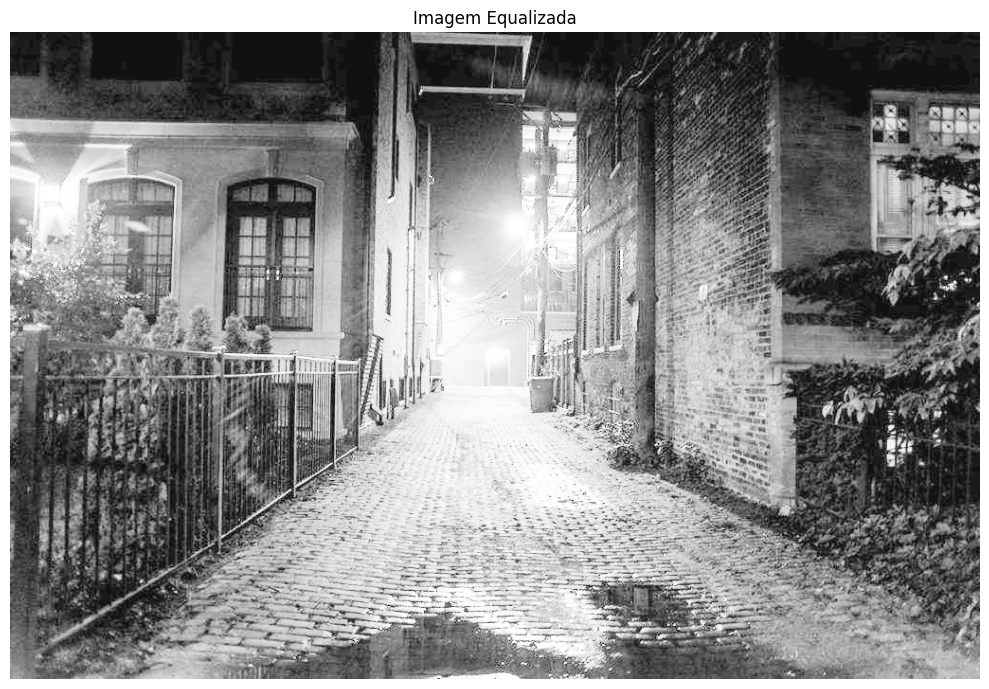

In [27]:
exibir_imagem(imagem_eq, titulo="Imagem Equalizada")
